In [2]:
# The usual imports:
import numpy as np
import scipy
import matplotlib as mpl
from matplotlib.pyplot import *
from numpy import *
from scipy import stats

from stanfitter import StanFitter
from cancer_data import bc_counts, bc_expect, pc_counts, pc_expect, ith_indx
# NY state cancer registry model:
cancer_code = """
data {
    int<lower=0> n_a; // # of areas
    int counts[n_a]; // cancer cases in each area
    real expect[n_a]; // expected # of cases in each area
}

parameters {
    real<lower=0.> fac[n_a];  // factor = actual prevalence/expected
    real<lower=0.> mu_f;  // pop'n mean for factors
    real<lower=0.> sigma_f;  // pop'n std dev'n for factors
}

transformed parameters {
    real<lower=0.> alpha;  // gamma dist'n alpha
    real<lower=0.> beta;  // gamma dist'n beta
    alpha = mu_f*mu_f / (sigma_f*sigma_f);
    beta = mu_f / (sigma_f*sigma_f);
}

model {
    mu_f~gamma(1.5,1.5);
    sigma_f~gamma(1.,1.);
    for(i in 1:n_a){
        fac[i]~gamma(alpha,beta);
        counts[i]~poisson(expect[i]*fac[i]);
    }
}
"""

cfitter = StanFitter(cancer_code)

bc_data = dict(n_a=len(bc_counts), counts=bc_counts, expect=bc_expect)
pc_data = dict(n_a=len(pc_counts), counts=pc_counts, expect=pc_expect)

Using cached StanModel from cached-model-Anon-02ac7ebb3149f3cd3bb593077d71497f.pkl...





Gradient evaluation took 0.000118 seconds
Gradient evaluation took 0.000116 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.18 seconds.
Adjust your expectations accordingly!


Gradient evaluation took 0.000192 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.16 seconds.
Adjust your expectations accordingly!


1000 transitions using 10 leapfrog steps per transition would take 1.92 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000243 seconds
1000 transitions using 10 leapfrog steps per transition would take 2.43 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (W

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Exception: gamma_lpdf: Shape parameter is 0, but must be > 0!  (in 'unknown file name' at line 25)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Exception: gamma_lpdf: Shape parameter is inf, but must be finite!  (in 'unknown file name' at line 25)

Exception: gamma_lpdf: Shape parameter is inf, but must be finite!  (in 'unknown file name' at line 25)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then th

Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.222209 seconds (Warm-up)
               0.175533 sec

Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.244872 seconds (Warm-up)
               0.457252 seconds (Sampling)
               0.702124 seconds (Total)



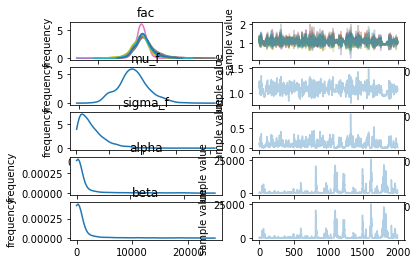

In [7]:
cfitter.set_data(bc_data)
n_iter, n_chains = 1000,4
bcfit = cfitter.sample(n_iter, n_chains,control={'adapt_delta': 0.99})
fig=bcfit.stan_plot()

In [11]:
print(bcfit.mu_f)
print(bcfit.sigma_f)
print(bcfit.fac)

Parameter <mu_f> summary:
Convergence and mixing diagnostics:  Rhat = 1.04, ESS = 135
Mean (se), median, sd:  1.07 (0.00672),  1.07,  0.0783
Central intvls:  50%: [1.03, 1.12];  95%: [0.932, 1.24]

Parameter <sigma_f> summary:
Convergence and mixing diagnostics:  Rhat = 1.03, ESS = 130
Mean (se), median, sd:  0.0945 (0.00673),  0.075,  0.077
Central intvls:  50%: [0.0383, 0.129];  95%: [0.00897, 0.292]

[{'fit': Inference for Stan model: anon_model_02ac7ebb3149f3cd3bb593077d71497f.
 4 chains, each with iter=1000; warmup=500; thin=1;
 post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
 fac[1]    1.06  5.5e-3   0.11   0.82   0.99   1.06   1.12   1.29    435   1.02
 fac[2]    1.08  6.1e-3   0.11   0.88   1.01   1.07   1.14   1.34    341   1.01
 fac[3]    1.06  4.8e-3   0.11   0.85   0.99   1.06   1.12   1.29    533   1.01
 fac[4]    1.07  6.0e-3   0.12   0.84    1.0   1.06   1.14   1.34    418   1



Gradient evaluation took 0.000301 seconds
1000 transitions using 10 leapfrog steps per transition would take 3.01 seconds.
Adjust your expectations accordingly!


Gradient evaluation took 0.000285 seconds
1000 transitions using 10 leapfrog steps per transition would take 2.85 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)

Gradient evaluation took 9.3e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.93 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)

Gradient evaluation took 0.000361 seconds
1000 transitions using 10 leapfrog steps per transition would take 3.61 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Wa

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: gamma_lpdf: Shape parameter is inf, but must be finite!  (in 'unknown file name' at line 25)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: gamma_lpdf: Shape parameter is 0, but must be > 0!  (in 'unknown file name' at line 25)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of t

Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.153393 seconds (Warm-up)
               0.11927 seconds (Sampling)
               0.272663 seconds (Total)

Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.198113 seconds (Warm-up)
               0.096695 seconds (Sampling)
               0.294808 seconds (Total)

Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 

Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.235754 seconds (Warm-up)
               0.180767 seconds (Sampling)
               0.416521 seconds (Total)



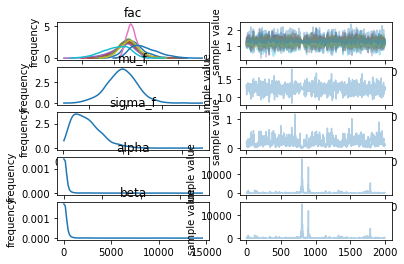

In [6]:
cfitter.set_data(pc_data)
n_iter, n_chains = 1000,4
pcfit = cfitter.sample(n_iter, n_chains,control={'adapt_delta': 0.99})
fig=pcfit.stan_plot()

In [12]:
print(pcfit.mu_f)
print(pcfit.sigma_f)
print(pcfit.fac)

Parameter <mu_f> summary:
Convergence and mixing diagnostics:  Rhat = 1.00, ESS = 846
Mean (se), median, sd:  1.23 (0.00363),  1.23,  0.106
Central intvls:  50%: [1.16, 1.29];  95%: [1.01, 1.44]

Parameter <sigma_f> summary:
Convergence and mixing diagnostics:  Rhat = 1.02, ESS = 198
Mean (se), median, sd:  0.201 (0.00881),  0.181,  0.124
Central intvls:  50%: [0.106, 0.27];  95%: [0.033, 0.492]

[{'fit': Inference for Stan model: anon_model_02ac7ebb3149f3cd3bb593077d71497f.
 4 chains, each with iter=1000; warmup=500; thin=1;
 post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
 fac[1]    1.31  5.2e-3   0.17   1.01    1.2   1.29    1.4    1.7   1113    1.0
 fac[2]     1.2  4.2e-3   0.15   0.89    1.1    1.2   1.29    1.5   1280    1.0
 fac[3]     1.2  4.0e-3   0.14   0.91    1.1    1.2   1.29   1.47   1300    1.0
 fac[4]    1.17  5.6e-3   0.18    0.8   1.06   1.18   1.28   1.52   1012    1.0
 fa